In [19]:
import numpy as pd 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import normalization_file
from sklearn.metrics import pairwise_distances #needed for several index  e.g adjusted Rand index 
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score





In [18]:
#example data used 
labels_true = [0, 0, 0, 0, 1, 1]
labels_pred = [0, 0, 0, 2, 2, 2]

#Rand Index - attention with permutations 
metrics.adjusted_rand_score(labels_true, labels_pred) #1.0 if there is maximum similarity 

#Silhouette Coefficient - if the ground truth labels are unknown 
X, y = datasets.load_iris(return_X_y=True) 

metrics.silhouette_score(X, labels, metric='euclidean')




NameError: name 'metrics' is not defined

In [20]:
#Internal evaluation on e-commerce dataset (not yet based on data_real)
data_num_norm = normalization_file.data_num_norm_normfile
print(data_num_norm.head(5))

x = data_num_norm.iloc[:,[0,4]].values


   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             0.751425     0.626620         0.929816              0.573101   
1             0.362306     0.393016         0.550801              0.359869   
2             0.524953     0.426378         0.524803              0.576396   
3             0.722409     0.787050         0.460890              0.428434   
4             0.574861     0.647702         0.594748              0.627768   

   Yearly Amount Spent  
0             0.651040  
1             0.266355  
2             0.453725  
3             0.639055  
4             0.673552  


In [137]:
#kmeans

km = KMeans(n_clusters=6, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

data_num_norm['cluster']= y_means
data_num_norm.head(5) 







,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,cluster
0,0.751425,0.626620,0.929816,0.573101,0.651040,3
1,0.362306,0.393016,0.550801,0.359869,0.266355,2
2,0.524953,0.426378,0.524803,0.576396,0.453725,0
3,0.722409,0.787050,0.460890,0.428434,0.639055,3
4,0.574861,0.647702,0.594748,0.627768,0.673552,1


In [40]:
#Cluster tendency 
#every algorithim finds at least one cluster in every dataset even the datset does not tend to have any clusters
#the hopkins statistics expresses the tendency the dataset has to provide clusters 
#values which tend 0 show a relatively good cluster tendency because of a not uniform distribution 
#our datset tends to provide clusters 

#hopkins statistics 
from pyclustertend import hopkins
from sklearn.preprocessing import scale
X = scale(x)
hopkins(X,500)






0.17897102095032377

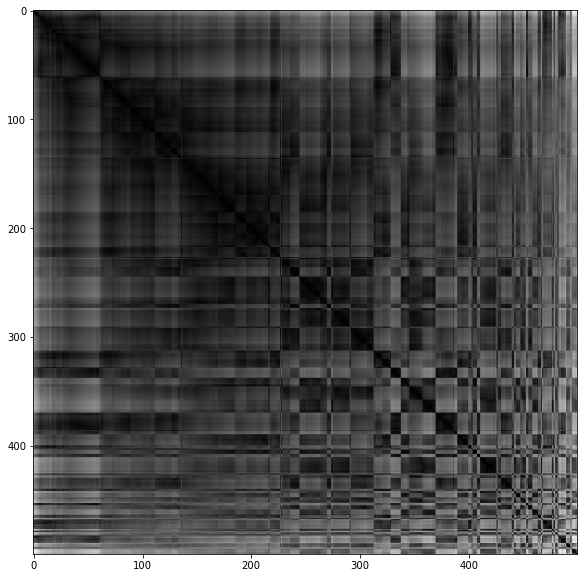

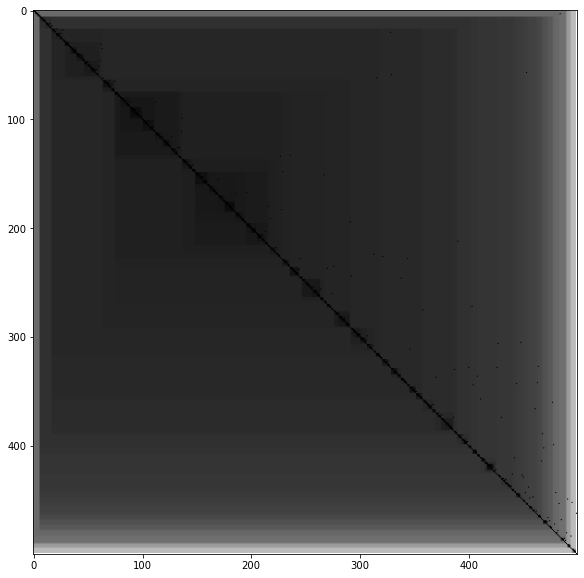

In [41]:
#VAT (visuel assesment of tendency)
#interpratation: the more black the square represents a smaller distance between obersvations - count the number of black squares on the diagonal thsi should represent the nuber of clusters 
from pyclustertend import vat
X = scale(X)
vat(X)


#iVAT is a more adavanced algorithim to VAT 
from pyclustertend import ivat
X = scale(X)
ivat(X)


In [124]:
#silhouette coefficient on k means results  
#takes the idea of cohersion und separation into account 
#-1 = bad clustering, 0=overlapping clusters, 1=ideal homogenius clustering) 
metrics.silhouette_score(x, y_means, metric='euclidean')


0.32441053821659277

In [129]:
#Calinski-Harabasz Index (variance ratio criterion)
#the higher the score the better the clusters are seperated from each other 
#probably only meaningful in direct relation to another algorithim 

metrics.calinski_harabasz_score(x,y_means)

320.1209593153657

In [131]:
#Davies-Bouldin Index
#0=lowest score by having best possible seperation 
davies_bouldin_score(x, y_means) 

0.9083323080519617

In [ ]:
#Kontigenzmatrix 

In [ ]:
#silhouette coefficient on DBSCAN results 

0